In [1]:
import cptac
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cptac warning: Your version of cptac (0.8.8) is out-of-date. Latest is 0.9.0. Please run 'pip install --upgrade cptac' to update it. (<ipython-input-1-174f66a50575>, line 1)


In [2]:
# Download Cancers
ccrcc = cptac.Ccrcc()
en = cptac.Endometrial()
luad = cptac.Luad()
hnscc  = cptac.Hnscc()
lscc = cptac.Lscc()

cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (<ipython-input-2-b6f1e8b3506b>, line 6)


In [3]:
def get_tumor_normal_df(cancer_type, gene):
    tumor = cancer_type.multi_join({'proteomics': gene, 'transcriptomics': gene}, tissue_type= 'tumor', flatten = True)
    normal = cancer_type.multi_join({'proteomics': gene, 'transcriptomics': gene}, tissue_type= 'normal', flatten = True)
    tumor = tumor.dropna()
    normal = normal.dropna()
    cutoff = 15
    if cancer == en:
        cutoff = 10
    if len(normal) < cutoff or len(tumor) < cutoff:
        return float("NaN")
    tumor.columns = ['proteomics', 'transcriptomics']
    normal.columns = ['proteomics', 'transcriptomics']
    groups = ['Tumor'] * len(tumor)
    groups.extend(['Normal']*len(normal))
    prot_list = list(tumor['proteomics'])
    prot_list.extend(list(normal['proteomics']))
    trans_list = list(tumor['transcriptomics'])
    trans_list.extend(list(normal['transcriptomics']))
    gene_df = pd.DataFrame({'Tissue': groups, 'Protein Abundance': prot_list, 'RNA Abundance': trans_list})
    return gene_df

In [4]:
def get_cancer_string(cancer):
    if cancer == ccrcc:
        return "CCRCC"
    if cancer == en:
        return 'Endometrial'
    if cancer == luad:
        return 'LUAD'
    if cancer == hnscc:
        return 'HNSCC'
    if cancer == lscc:
        return 'LSCC'

In [5]:
cancer_genes = ['TP53', 'RAB5A', 'BRAF', 'SPTA1']
cancer_list = [ccrcc, en, luad, hnscc, lscc]

In [6]:
# Make df for grid plot
dfs = []
for cancer in cancer_list:
    for gene in cancer_genes:
        gene_df = get_tumor_normal_df(cancer, gene)
        gene_df['Cancer'] = [get_cancer_string(cancer)] * len(gene_df)
        gene_df['Gene'] = [gene] * len(gene_df)
        dfs.append(gene_df)
df = pd.concat(dfs)

cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 700)
cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 700)
cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 700)
cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 700)
cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 700)
cptac warning: You t

In [7]:
df

,Tissue,Protein Abundance,RNA Abundance,Cancer,Gene
0,Tumor,0.402191,9.780815,CCRCC,TP53
1,Tumor,0.092737,5.350098,CCRCC,TP53
2,Tumor,0.288820,8.795810,CCRCC,TP53
3,Tumor,0.346025,6.911960,CCRCC,TP53
4,Tumor,-0.265361,6.610207,CCRCC,TP53
...,...,...,...,...,...
195,Normal,-0.788000,10.293500,LSCC,SPTA1
196,Normal,-0.322600,9.841800,LSCC,SPTA1
197,Normal,0.660700,10.935900,LSCC,SPTA1
198,Normal,1.128500,10.572600,LSCC,SPTA1


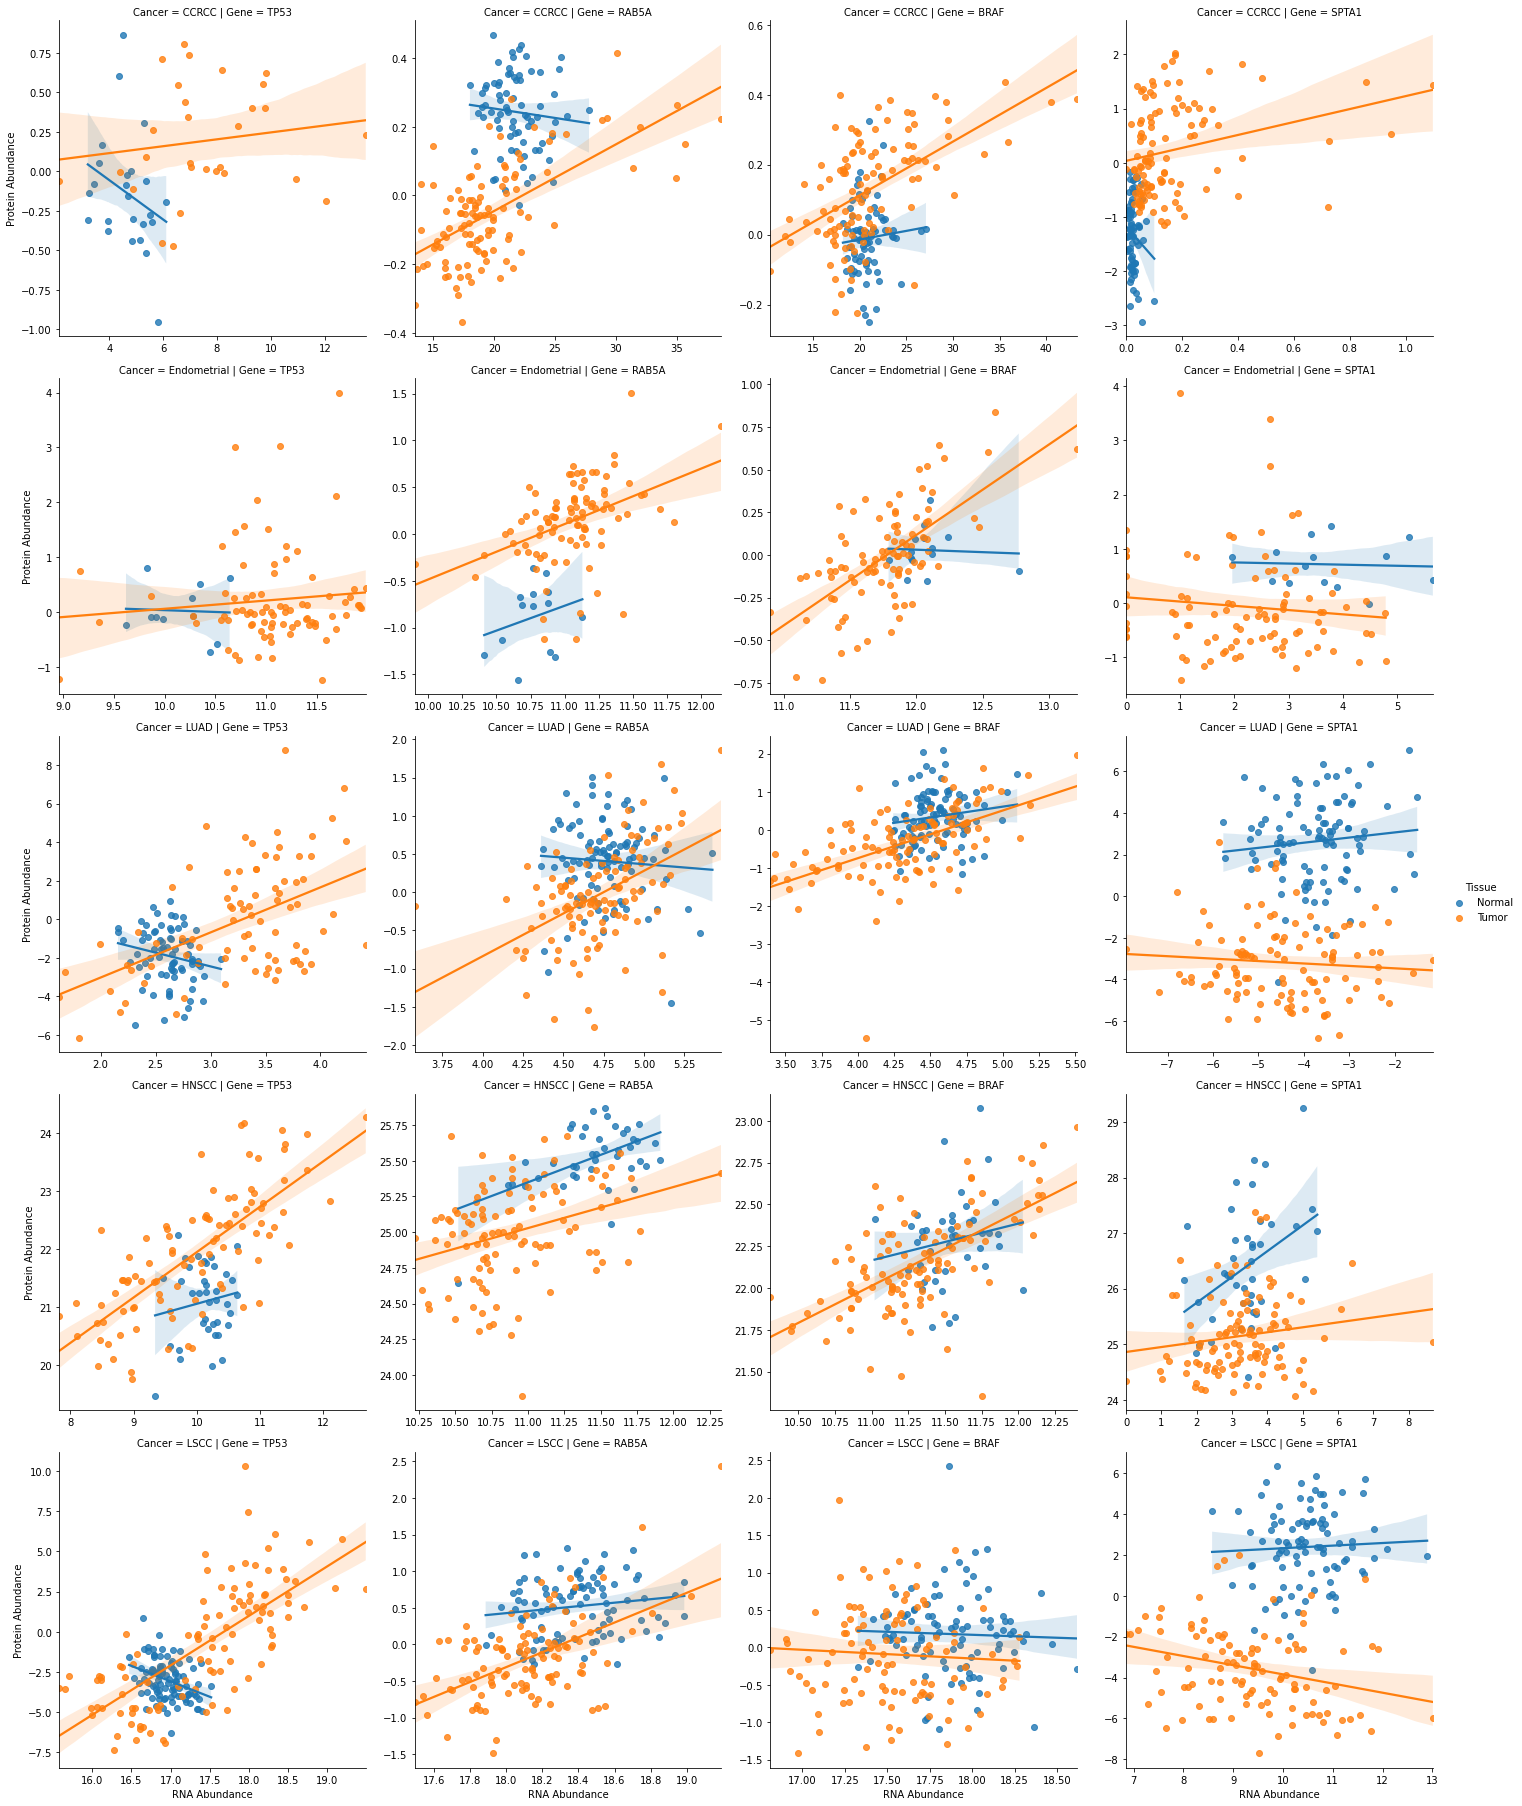

In [8]:
# Make grid plot of all
def label_axes():
    ax = plt.gca()
    ax.xlabel('')
    ax.ylabel(ylab)
g = sns.lmplot(data = df, y = 'Protein Abundance', 
               x = 'RNA Abundance', hue = 'Tissue', 
               col = 'Gene', row = 'Cancer',sharex = False, 
               sharey = False, hue_order = ['Normal', 'Tumor'],
               legend=True, legend_out=True)
g.savefig('Figures/Figure 2) Individual Gene Correlations.png')
